In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Admission_Predict.csv")

# Check top5 rows

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Checck bottom5 rows

In [4]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


# Get details of Dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


# Check for Nullvalues

In [6]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Get Statistic Summary of Data

In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Drop unnecessary columns

In [8]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
data= data.drop('Serial No.', axis=1)

In [10]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Store feature in X and Y

In [11]:
X= data.drop('Chance of Admit ', axis=1 )   ## independent variable 

In [12]:
Y= data['Chance of Admit ']     ## taget variable

# Split data into Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=42) 

In [15]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...
246,316,105,3,3.0,3.5,8.73,0
227,312,110,2,3.5,3.0,8.53,0
369,301,98,1,2.0,3.0,8.03,1
176,329,119,4,4.5,4.5,9.16,1


# Feature Scaling

In [16]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc= StandardScaler()

In [19]:
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [20]:
X_train

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]])

# Classification

In [21]:
import numpy as np

In [22]:
Y_train= [1 if value>0.8 else 0 for value in Y_train]
Y_test= [1 if value>0.8 else 0 for value in Y_test]

Y_train= np.array(Y_train)
Y_test= np.array(Y_test)

In [23]:
Y_test

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

# Import Models

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Model Training

In [29]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred1 =lr.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))

0.925


In [30]:
svm = svm.SVC()
svm.fit(X_train,Y_train)
Y_pred2= svm.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))

0.925


In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred3= knn.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))

0.8875


In [32]:
rf= RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred4= rf.predict(X_test)
print(accuracy_score(Y_test,Y_pred4))

0.9375


In [33]:
gr= GradientBoostingClassifier()
gr.fit(X_train,Y_train)
Y_pred5= gr.predict(X_test)
print(accuracy_score(Y_test,Y_pred5))

0.975


In [34]:
final_data= pd.DataFrame({'Models':['LR','SVC','KNN','RF','GBC'],
                         'ACC_Score':[accuracy_score(Y_test,Y_pred1),accuracy_score(Y_test,Y_pred2),
                                     accuracy_score(Y_test,Y_pred3),accuracy_score(Y_test,Y_pred4),
                                     accuracy_score(Y_test,Y_pred5)]})

In [35]:
final_data

,Models,ACC_Score
0,LR,0.9250
1,SVC,0.9250
2,KNN,0.8875
3,RF,0.9375
4,GBC,0.9750


In [36]:
import seaborn as sns

C:\Users\91701\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC_Score'>

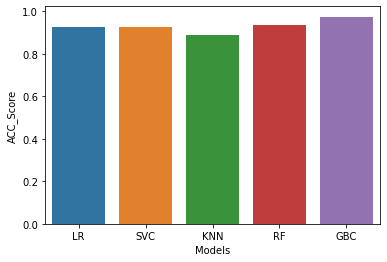

In [37]:
sns.barplot(final_data['Models'],final_data['ACC_Score'])

Above visualtion shows that Gradient Boosting Classifier(GBC) is best for our dataset.

# Save Model

In [38]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [40]:
X= data.drop('Chance of Admit ',axis=1)

In [41]:
Y= data['Chance of Admit ']

In [42]:
Y= [1 if value>0.8 else 0 for value in Y] 

In [43]:
Y= np.array(Y)

In [44]:
Y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [45]:
X= sc.fit_transform(X)

In [46]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [47]:
gr= GradientBoostingClassifier()
gr.fit(X,Y)

GradientBoostingClassifier()

In [48]:
import joblib

In [49]:
joblib.dump(gr,'admission_model')

['admission_model']

In [50]:
model= joblib.load('admission_model')

In [51]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Test on Random data

In [112]:
a=int(input("Enter your 'GRE Score': "))
b=int(input("Enter your 'TOEFL Score': "))
c=int(input("Enter your 'University Rating: "))
d=float(input("Enter your 'SOP': "))
e=float(input("Enter your 'LOR': "))
f=float(input("Enter your 'CGPA': "))
g=int(input("Enter your 'Research( 1 for YES or 0 for NO)': "))


Result = model.predict(sc.transform([[a,b,c,d,e,f,g]]))

print("\nPrediction:") 
if Result==0:
    print("Student Having less chances to get Admission")
else:
    print("Student Having higher chances to get Admission")



Enter your 'GRE Score': 5
Enter your 'TOEFL Score': 4
Enter your 'University Rating: 6
Enter your 'SOP': 4
Enter your 'LOR': 8
Enter your 'CGPA': 9
Enter your 'Research( 1 for YES or 0 for NO)': 0

Prediction:
Student Having less chances to get Admission


C:\Users\91701\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
